In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Loading and preparing data 

In [2]:
#importing the mnist data set to run it through the neural network
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#each image is a 28 x 28 pixel image
x_train[0].shape

(28, 28)

In [4]:
#the 2 dimensional array for the first element in the training batch
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

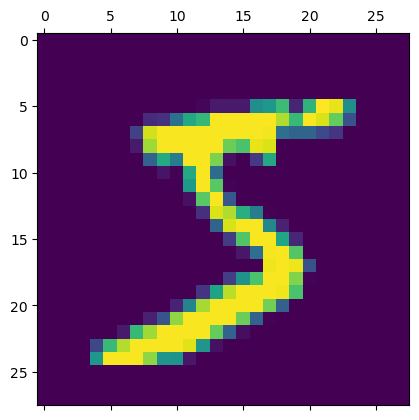

In [5]:
plt.matshow(x_train[0])

In [6]:
#each image has been labelled
y_train[0]

5

In [7]:
#scaling the matrices to improve model perfomance
x_train = x_train / 255
x_test = x_test / 255

In [8]:
#for each pixel in the image there will be a neuron to take care of it
#so the 2d array has to be flattened into a 1d array
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [9]:
x_test_flattened.shape

(10000, 784)

In [10]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Creating a 1 layer neural network

In [37]:
#creating a simple nn
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
#choosing what loss function to optimize and what algorithm to use to do that
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
#setting the number of training loops
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4620 - accuracy: 0.8810
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9253


In [44]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.9254


[0.2690644860267639, 0.9254000186920166]

In [39]:
#the values in the array are the scores for each one of the neurons in the output layer of the nn.
#so there will be 10 values in the array representing the activation score for the corresponding neuron
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.10866816e-02, 3.61288869e-07, 1.02556564e-01, 9.69291866e-01,
       2.07190705e-03, 1.29155606e-01, 1.58758610e-06, 9.99851823e-01,
       1.08610556e-01, 7.51867354e-01], dtype=float32)

In [40]:
#this numpy function returns the index of the maximum value in the array, this being the predicted number.
np.argmax(y_predicted[0])

7

In [41]:
#creating a new array with all the prediction outcomes to then make a confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
#building a confusion matrix to see how well the model works
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    4,    2,    2,    1],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   7,    9,  929,   15,    6,    2,   11,   10,   38,    5],
       [   3,    0,   21,  926,    0,   18,    2,   11,   20,    9],
       [   2,    1,    8,    2,  890,    0,    8,    4,   11,   56],
       [  10,    3,    7,   42,    8,  761,   10,    6,   37,    8],
       [  14,    3,    9,    1,    7,    9,  909,    2,    4,    0],
       [   1,    6,   23,    6,    3,    0,    0,  947,    3,   39],
       [   6,    8,    6,   24,    9,   17,    8,   11,  874,   11],
       [  10,    7,    1,   10,   12,    4,    0,   16,    8,  941]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

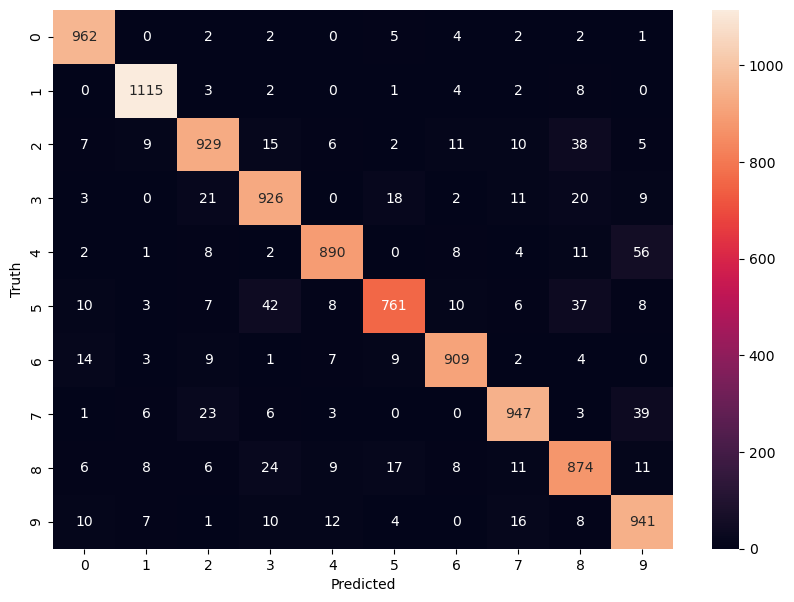

In [43]:
#using seaborn library to better visualize the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adding a hidden layer to the neural network

### This will improve the models performance

In [45]:
#creating a simple nn
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]) 

#choosing what loss function to optimize and what algorithm to use to do that
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#setting the number of training loops
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2735 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1221 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0843 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0640 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0518 - accuracy: 0.9843


In [47]:
#with just one more hidden layer the model has drastically improved its performance
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9722


[0.0882062166929245, 0.9721999764442444]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

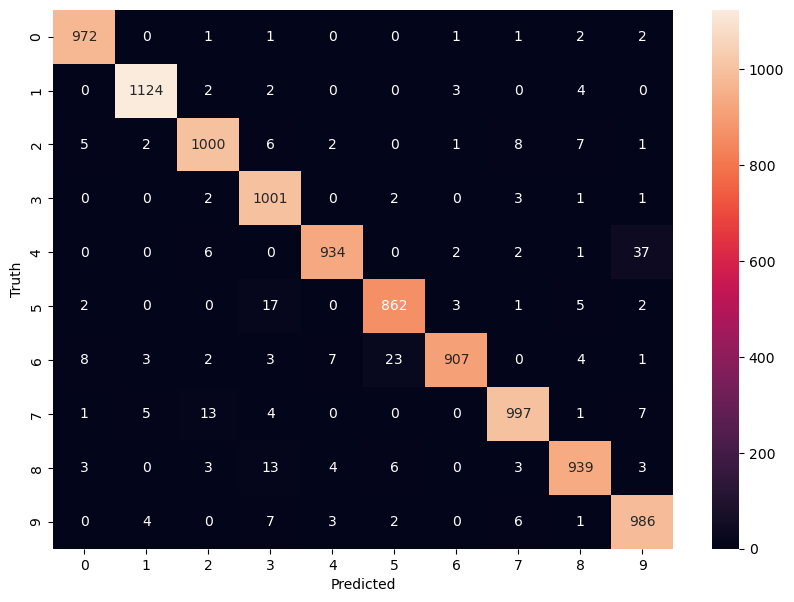

In [51]:
#replotting a confusion matrix for the new model
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#the model now shows a much higher accuracy predicting the right number